In [1]:
import pandas as pd
data = pd.read_csv("spam.csv")
data

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [49]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

data["text"] = data["text"].str.lower()
data["target"] = data["target"].str.lower()
data["text"] = data["text"].str.replace(r"[! ? * ]", " ", regex=True)
text = data["text"]
def preprocess(text):
    text = re.sub(r"http\S+|WWW.\S+",'',text) #removing links
    text = re.sub(r'\d+', '', text) #removing numbers
    text = text.translate(str.maketrans('','',string.punctuation)) #remowing punctuation marks 
    words = text.split()  
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    stemer = PorterStemmer()
    words = [stemer.stem(w) for w in words]
    return ''.join(words)
text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home 
5569    pity,   was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5572, dtype: object

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(text)
y = data["target"].map({"ham" : 0, 'spam' : 1})


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

xtrain, xtest , ytrain, ytest = train_test_split(x, y, test_size=0.03)
model = MultinomialNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(classification_report(y_pred, ytest))



              precision    recall  f1-score   support

           0       1.00      0.97      0.99       149
           1       0.83      1.00      0.90        19

    accuracy                           0.98       168
   macro avg       0.91      0.99      0.95       168
weighted avg       0.98      0.98      0.98       168


In [59]:
#Get input from user or define a new email text
new_email = input("Enter the email text: ")

#Preprocess the text (using the same previous function
new_email_cleaned = preprocess(new_email)

#Convert the cleaned text to numerical features (using the existing vectorizer)
new_email_vectorized = vectorizer.transform([new_email_cleaned])  # Note: it must be a list

#Predict using the trained model
prediction = model.predict(new_email_vectorized)

#Display the result
if prediction[0] == 1:
    print("📩 This email is **SPAM**.")
else:
    print("✅ This email is **HAM (not spam)**.")


✅ This email is **HAM (not spam)**.


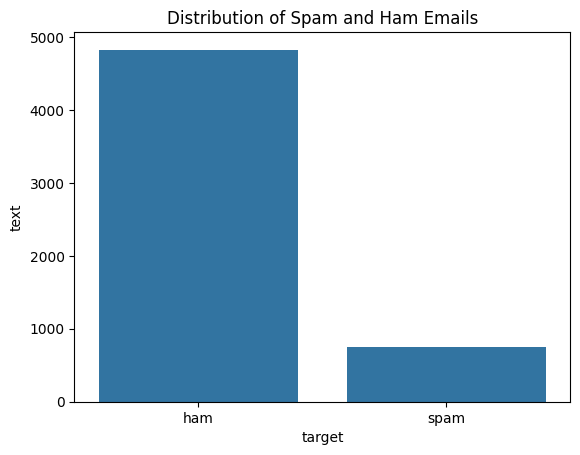

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of spam and ham emails
sns.countplot(x='target', data=data)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('target')
plt.ylabel('text')
plt.show()

